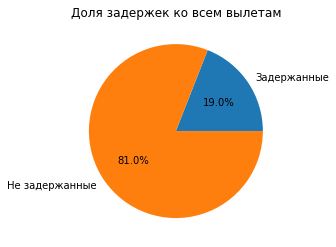

Доля всех задержек ко всем вылетам: 0.19044


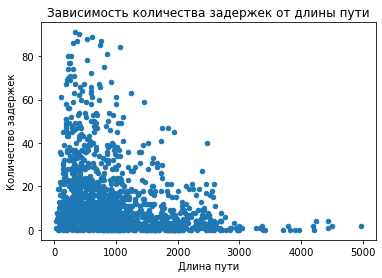

Чем короче расстояние, тем больше задержек рейсов


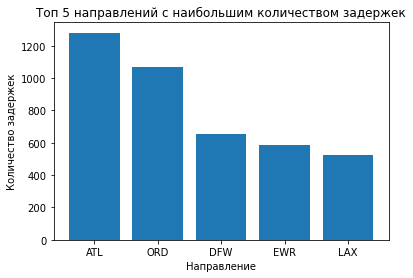

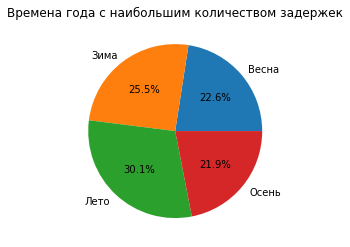

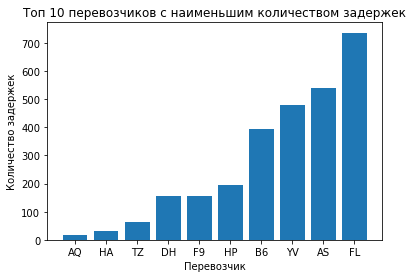

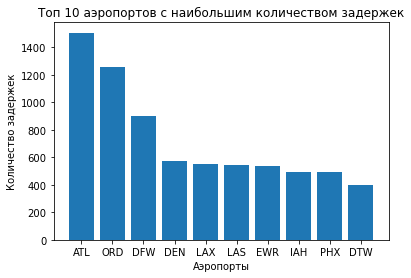

В пятницу больше всего задержек, потому что конец рабочей недели увеличивает пасажиропоток => загруженность аэропорта


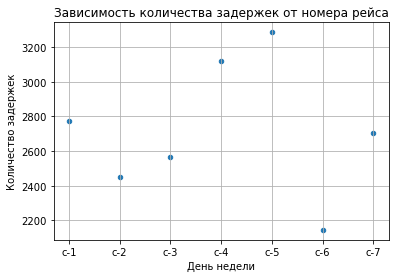

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# чтение файла
flight_delays = pd.read_csv('flight_delays.csv')

# доля всех задержек ко всем вылетам
delayed_flights = flight_delays[flight_delays['dep_delayed_15min'] == 'Y']
delayed_proportion = len(delayed_flights)/len(flight_delays)
not_delayed_ratio = 1 - delayed_proportion
plt.pie([delayed_proportion, not_delayed_ratio], labels=['Задержанные', 'Не задержанные'], autopct='%1.1f%%')
plt.title('Доля задержек ко всем вылетам')
plt.show()
print("Доля всех задержек ко всем вылетам:", delayed_proportion)

# зависимость количества задержек от длины пути
delayed_flights = flight_delays[flight_delays['dep_delayed_15min'] == 'Y']
flight_delays['dep_delayed_flag'] = flight_delays['dep_delayed_15min'].apply(lambda x: 1 if x == 'Y' else 0)
column_of_interest = 'Distance'
flight_delays.groupby(column_of_interest)[['dep_delayed_flag']].sum()\
    .reset_index().plot(x=column_of_interest
                        , y='dep_delayed_flag'
                        , kind='scatter')
plt.xlabel('Длина пути')
plt.ylabel('Количество задержек')
plt.title('Зависимость количества задержек от длины пути')
plt.show()
print('Чем короче расстояние, тем больше задержек рейсов')

# топ 5 направлений с наибольшим количеством задержек
top_destinations = flight_delays.groupby('Dest')['dep_delayed_15min'].apply(lambda x: sum(x == 'Y')).sort_values(ascending=False)[:5]
plt.bar(top_destinations.index, top_destinations.values)
plt.xlabel('Направление')
plt.ylabel('Количество задержек')
plt.title('Топ 5 направлений с наибольшим количеством задержек')
plt.show()

# времена года с наибольшим количеством задержек
seasons_dict = {'c-3': 'Весна', 'c-4': 'Весна', 'c-5': 'Весна', 'c-6': 'Лето', 'c-7': 'Лето', 'c-8': 'Лето', 'c-9': 'Осень', 'c-10': 'Осень', 'c-11': 'Осень', 'c-12': 'Зима', 'c-1': 'Зима', 'c-2': 'Зима'}
flight_delays['season'] = flight_delays['Month'].map(seasons_dict)
seasons_delayed = flight_delays[flight_delays['dep_delayed_15min'] == 'Y'].groupby('season')['dep_delayed_15min'].count()
plt.pie(seasons_delayed, labels=seasons_delayed.index, autopct='%1.1f%%')
plt.title('Времена года с наибольшим количеством задержек')
plt.show()

# топ 10 перевозчиков с наименьшим количеством задержек
carrier_delays = flight_delays.groupby('UniqueCarrier')['dep_delayed_15min'].apply(lambda x: (x == 'Y').sum()).reset_index(name='delays')
carrier_delays = carrier_delays.sort_values('delays').head(10)
plt.bar(carrier_delays['UniqueCarrier'], carrier_delays['delays'])
plt.xlabel('Перевозчик')
plt.ylabel('Количество задержек')
plt.title('Топ 10 перевозчиков с наименьшим количеством задержек')
plt.show()

# топ 10 аэропортов с наибольшим количеством задержек
airport_delays = flight_delays.groupby('Origin')['dep_delayed_15min'].apply(lambda x: sum(x == 'Y')).sort_values(ascending=False)[:10]
plt.bar(airport_delays.index, airport_delays.values)
plt.xlabel('Аэропорты')
plt.ylabel('Количество задержек')
plt.title('Топ 10 аэропортов с наибольшим количеством задержек')
plt.show()
# необычная зависимость количества задержек от имеющихся данных
column_of_interest = 'DayOfWeek'
flight_delays.groupby(column_of_interest)[['dep_delayed_flag']].sum()\
    .reset_index().plot(x=column_of_interest
                        , y='dep_delayed_flag'
                        , kind='scatter')
plt.xlabel('День недели')
plt.ylabel('Количество задержек')
plt.title('Зависимость количества задержек от номера рейса')
print("В пятницу больше всего задержек, потому что конец рабочей недели увеличивает пасажиропоток => загруженность аэропорта")
plt.grid()
plt.show()